In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import Image
import matplotlib.font_manager as fm
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simkai.ttf",size=16) 

## 一、磁场作用于NV使悬臂梁受力：
<font size=4> $\color{red} {1. 磁场中磁矩的能量：E=- \vec{\mu}\cdot\vec{B}，F_z=\frac{\partial{E}}{\partial{z}}}$ 。</font> <br />
<font size=4> $\frac{轨道磁矩}{轨道角动量}=\frac{-e}{2m_ec}$，$\frac{自旋磁矩}{自旋角动量}=\frac{-e}{m_ec}$，玻尔磁子$\mu_B=\frac{e\hbar}{2m_ec}=9.27*10^{-24}J/T$ <br />
 $S=1$的自旋，$\mu_S=\frac{-e}{m_ec}S$，所以$\mu_S=\frac{-\mu_B*2*\hbar}{\hbar}$。

<font size=4>$\color{red} {2. 假设磁场沿Z轴方向}$，$F_z=-\frac{\partial E}{\partial z}=2\mu_B \frac{\partial B}{\partial z}$，假设磁场梯度为0.5T/m，那么$F_z=2\mu_B*0.5T/m=9.27*10^{-24}N $。</font> <br />

<font size=4>$\color{red} {悬臂梁振子示意图：}$

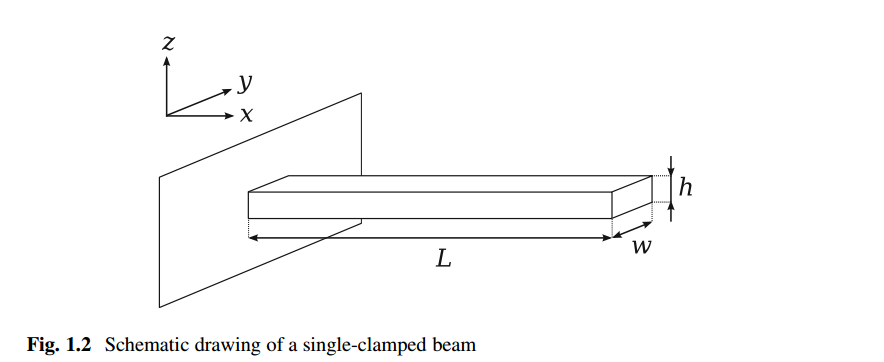

In [2]:
PATH = "C:/Users/sunhuanying/Desktop/CSRC/Tex for Cantilever/Figures/"
Image(filename = PATH +"fig002.png", width=600, height=400)

<font size=4> Uniform load p per unit length plus  an end load P，$\color{red} {悬臂梁振子的频率:}$
$$\begin{equation}
\begin{aligned}
f_1=\frac{1.732}{2\pi}\sqrt{\frac{EIg}{Pl^3+0.236pl^4}}
\end{aligned}
\end{equation}
$$
<font size=4>$p(N/m)$可以考虑成单位长度悬臂梁本身的重量，$P(N)$是施加的力，$I_x=wt^3/12$, w是悬臂梁宽度，t是厚度。假设NV-Center自旋密度 $\rho=10^{15}个/cm^3 $，金刚石密度$\rho=3.5g/cm^3$，弹性模量$E=1100GPa$，振子长度宽度$w=8\mu m$，厚度$h=4\mu m$，$g=9.8m/s^2$ 是重力加速度。频率移动和悬臂梁振子长度L的关系为：

In [3]:
h=6.626*1e-34
hbar=h/(2*np.pi)
k_B=1.38*1e-23
g=9.8
#
E=1100*1e9
rho=3500
w=8*1e-6              # width of cantilever
h=4*1e-6               # thickness of cantilever
I_y=w*h**3/12          # moment of inertia
A=w*h
K_1=1.732
p=rho*w*h*g

In [4]:
L_ini=5e-6
L_end=50*1e-6                              # changing the length of cantilever
L_num=101
L_vec = np.linspace(L_ini,L_end,L_num)
Force_SingleNV=2*9.27*1e-21             # Force of single NV  with gradient of magnetic field 1000T/m.
N_NV=1e3                                # number of NV
f_origin_list= []
f_strain_list= []
Delta_f_list = []
for L in L_vec:
    f_origin=K_1/(2*np.pi)*np.sqrt(E*I_y*g/(0.236*p*L**4))
    f_strain=K_1/(2*np.pi)*np.sqrt(E*I_y*g/(Force_SingleNV*N_NV*L**3+0.236*p*L**4))
    Delta_f= f_origin-f_strain
    f_origin_list.append(f_origin)
    f_strain_list.append(f_strain)
    Delta_f_list.append(Delta_f)

In [5]:
L_vec=L_vec*1e6
f_origin_list=np.array(f_origin_list)/1e6
f_strain_list=np.array(f_strain_list)/1e6
Delta_f_list= np.array(Delta_f_list)/1e6

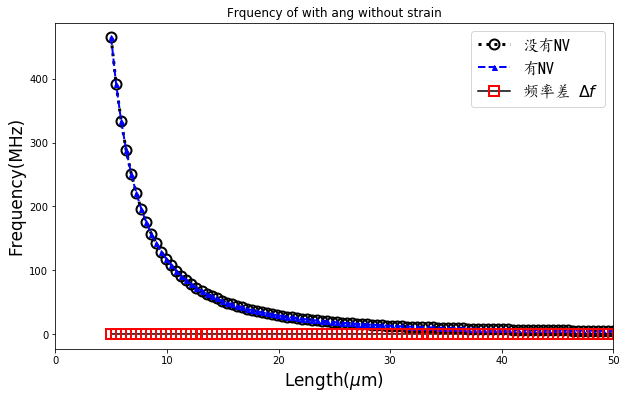

In [6]:
plt.subplots(1,1,figsize = (10,6))
ln1, =plt.plot(L_vec,f_origin_list,color = 'k', linewidth = 3.0, linestyle = ':',
               marker='o', markersize=10, markerfacecolor='none',markeredgewidth = 2)
ln2, =plt.plot(L_vec,f_strain_list,color = 'blue', linewidth = 2.0,linestyle = '--',marker='^',markersize='5')
ln3, =plt.plot(L_vec,Delta_f_list,'ks-',markersize='10',color='black', markerfacecolor='none', markeredgecolor='red',markeredgewidth = 2)
plt.xlabel('Length($\mu$m)',fontsize=17)
plt.ylabel('Frequency(MHz)',fontsize=17)
plt.title('Frquency of with ang without strain')
plt.legend(handles=[ln1, ln2, ln3], labels=['没有NV', '有NV','频率差 $\Delta f$ '],
    loc='upper right',prop=my_font)
plt.xlim(0,50)
plt.show()

Text(0.5, 1.0, 'The zoom of frequency difference')

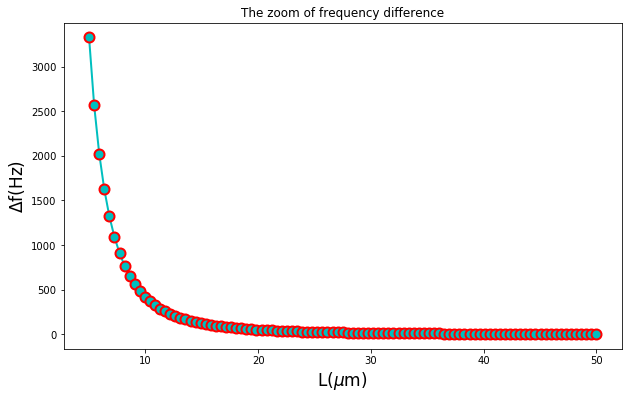

In [7]:
plt.subplots(1,1,figsize = (10,6))
plt.plot(L_vec,Delta_f_list*1e6,color = 'c', linewidth = 2.0, linestyle = '-',
         marker='o',markersize='10',markeredgecolor='r',markeredgewidth = 2)
plt.xlabel('L($\mu$m)',fontsize=17)
plt.ylabel('$\Delta$f(Hz)',fontsize=17)
plt.title('The zoom of frequency difference')
# plt.xlim(0,50)
# plt.ylim(0,10)
#L_v=range(0,100,10)
#list(L_v)

In [8]:
#Delta_f_list[18]
N=41
X=N*(L_end-L_ini)/(L_num-1)
Q=f_origin_list[N]/(Delta_f_list[N]*2) # 假设5分之1线宽的频率移动能被探测到。
#f_origin_list[]
print(('Length of Cantilever = %e micrometer')%(X*1e6))
print(('Frequency without NV = %eMHz \n' 'Difference = %eMHz\n' 'Quality factor = %d')% (f_origin_list[N],Delta_f_list[N],Q))
#ratio=1-np.sqrt(1-(omega_NV*A*L_vec[N]**2/(K_n**2*E*I_y)))
#print(('D = %.8e Hz')%(ratio*f_origin_list[N]))

Length of Cantilever = 1.845000e+01 micrometer
Frequency without NV = 2.112312e+01MHz 
Difference = 3.223575e-05MHz
Quality factor = 327634


## 二、温度主导（共振情况） : 
<font size=4>$\color{red}{1. \Delta F_{th}=\sqrt{\frac{4kk_BT}{Q\pi f_0\tau_s}}, \Delta E_{th}=\frac{1}{2}\frac{(\Delta F_{th})^2}{k}=\frac{2k_BT}{Q\pi f_0\tau_s}.}$  </font> <br />
<font size=4>弹性系数$k=\frac{3EI_y}{L^3}$，$k_B=1.38*10^{-23}J/K$玻尔兹曼常数，T：温度，$f_0$：振子频率，Q：品质因子，衰减时间$\tau_0=Q/\pi f_0$，$\tau_s=2/\Delta f$ 积分时间，$\Delta f=2/\tau_0=2\pi f_0/Q$。</font>  <br />
热力学引起的涨落$\Delta F=k*\Delta X$，引起的频率变化$\Delta f=\frac{\sqrt{g}}{2\pi}(\sqrt{\frac{1}{L+\Delta X}}-\sqrt{\frac{1}{L}})$引起振子频率变化。

In [12]:
T=10 # temperature
k_spring=3*E*I_y/L_vec[N]**3
t_s=2/Delta_f_list[N]
f_0=f_origin_list[N]
Delta_E=2*k_spring*k_B*T/(Q*np.pi*f_0*t_s)
Delta_X_thermal=np.sqrt(2*k_B*T*Q*Delta_f_list[N]/(k_spring*np.pi*f_0))
print('Delta F=%e' % (k_spring*Delta_X_thermal))
Delta_f_thermal=np.sqrt(9.8)/(2*np.pi)*(np.sqrt(1/(L_vec[N]+Delta_X_thermal))-np.sqrt(1/L_vec[N]))*1e6
Delta_f_thermal

Delta F=6.925508e-19


-0.13914434868840503

## 三、结论
<font size=4> 在磁场梯度为1000T/m，单个NV所获得的外力$F=2\mu_B \frac{\partial B}{\partial z}=2*9.27*10^{-24}N$。热涨落的影响导致$F \sim 10^{-20}N$，频率移动$0.1Hz$。如果悬臂梁右端NV数量为$10^3$个，悬臂梁振子品质因子在几十万时候能探测到NV所引起的频率变化。<br />